# Image Classifier Algorithm


In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

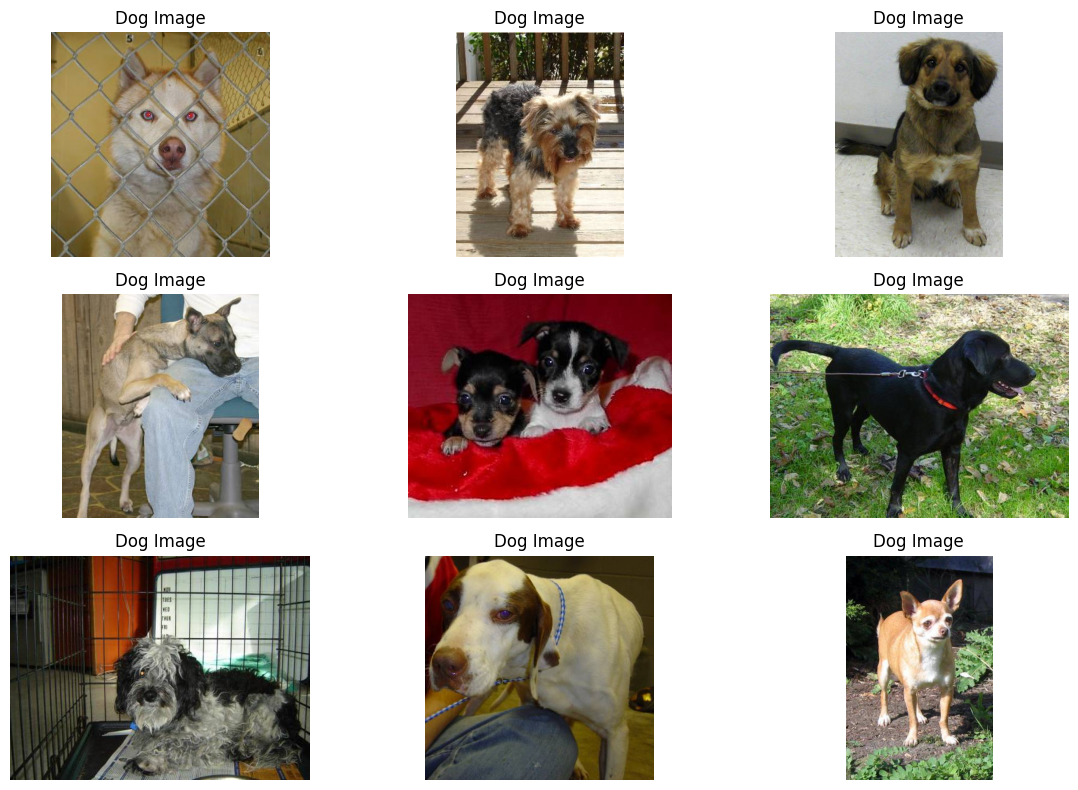

In [12]:
data_path = "/workspaces/Israel-Project-ImageClassifier/Israel/data/"
dog_folder = os.path.join(data_path, "dog")
dog_image_files = os.listdir(dog_folder)

dog_images = []

for i in range(9):
    image_path = os.path.join(dog_folder, dog_image_files[i])
    img = image.load_img(image_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    dog_images.append(img_array)

plt.figure(figsize = (12,8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')



plt.tight_layout()


plt.show()

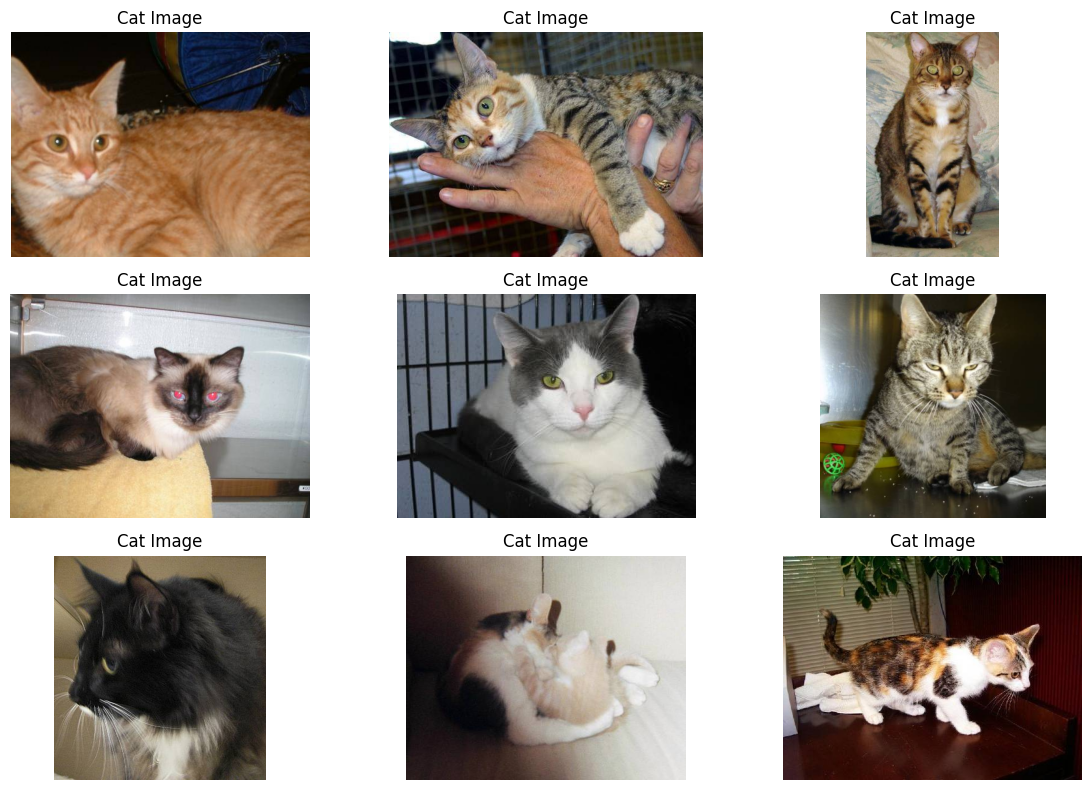

In [13]:
data_path = "/workspaces/Israel-Project-ImageClassifier/Israel/data/"
cat_folder = os.path.join(data_path, "cat")
cat_image_files = os.listdir(cat_folder)

cat_images = []

for i in range(9):
    image_path = os.path.join(cat_folder, cat_image_files[i])
    img = image.load_img(image_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cat_images.append(img_array)

plt.figure(figsize = (12,8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_images[i])
    plt.title('Cat Image')
    plt.axis('off')



plt.tight_layout()


plt.show()

In [14]:
train_dir = "../Israel/data/"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()


train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"] 
)

Found 25000 images belonging to 2 classes.
Found 0 images belonging to 1 classes.


In [15]:
model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
#model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
#model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))

model.add(GlobalAveragePooling2D())
#model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [16]:
model.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])


In [17]:
model.fit(train_data, epochs = 1)

2023-12-17 18:22:09.509009: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15360000 exceeds 10% of free system memory.
2023-12-17 18:22:10.505432: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.
2023-12-17 18:22:11.008099: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15360000 exceeds 10% of free system memory.


782/782 [==============================] - 3615s 5s/step - loss: 0.7473 - accuracy: 0.5350


In [21]:
checkpoint = ModelCheckpoint("../Israel/models/IC_model", monitor = "accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 1, callbacks = [checkpoint, early])


100/100 [==============================] - ETA: 0s - loss: 0.6700 - accuracy: 0.5756
Epoch 1: accuracy improved from -inf to 0.57563, saving model to ../models/IC_model
INFO:tensorflow:Assets written to: ../models/IC_model/assets


INFO:tensorflow:Assets written to: ../models/IC_model/assets


100/100 [==============================] - 461s 5s/step - loss: 0.6700 - accuracy: 0.5756
